# Tone indicator Mark II

In [ ]:
import pandas as pd
import numpy as np 


# Exploratory Data Analysis and Cleaning 

In [ ]:
sarcastic_alldf = pd.read_csv('train-balanced-sarcasm 2.csv') # Upload 

In [ ]:
sarcastic_alldf = sarcastic_alldf[['label', 'comment']] 
sarcastic_indices = sarcastic_alldf.groupby('label').groups[1] # sort by sarcastic 
genuine_indices = sarcastic_alldf.groupby('label').groups[0]

In [ ]:
sarcastic = sarcastic_alldf.iloc[sarcastic_indices]
genuine = sarcastic_alldf.iloc[genuine_indices]

In [ ]:
sarcastic

,label,comment
33,1,But they'll have all those reviews!
44,1,wow it is totally unreasonable to assume that ...
45,1,Ho ho ho... But Melania said that there is no ...
66,1,I can't wait until @potus starts a twitter war...
69,1,gotta love the teachers who give exams on the ...
...,...,...
37359,1,Blondes are usually stupid.
37371,1,And we were doing so great before that!
37372,1,"Oh, thanks for setting us straight, federalist."
37373,1,Yeah because the FBI/CIA don't have better thi...


In [ ]:
sarcastic['comment'] = sarcastic['comment'].str.replace("[^a-zA-Z#]", " ")  # remove punctuation
genuine['comment'] = genuine['comment'].str.replace("[^a-zA-Z#]", " ")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
#sarcastic['comment'] = sarcastic['comment'].str.lower() # Lower case everythign 
#genuine['comment'] = genuine['comment'].str.lower() # Lower case everythign 


In [ ]:
!pip install nltk

In [ ]:
# remove stop words 
import nltk 
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
def remove_stopwords(sentence): 
  review_tokenized = word_tokenize(sentence) 
  filtered_sentence = []
  for word in review_tokenized: 
    if word not in (stopwords): 
      filtered_sentence.append(word)
  rev_new = " ".join(filtered_sentence)
  return rev_new



In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords = stopwords.words('english')
print(type(stopwords))

<class 'list'>


In [ ]:
newWords = ['the','to','and','of','they','because']
stopwords = stopwords.extend(newWords)

In [ ]:
sarcastic = sarcastic.loc[0:12000]
sarcastic

,label,comment
33,1,But they ll have all those reviews
44,1,wow it is totally unreasonable to assume that ...
45,1,Ho ho ho But Melania said that there is no ...
66,1,I can t wait until potus starts a twitter war...
69,1,gotta love the teachers who give exams on the ...
...,...,...
11918,1,He s a white dude it s all good
11920,1,I can t believe Cleveland hasn t won a game wi...
11921,1,No Sausage Party
11931,1,Because literally only those three can surpass...


In [ ]:
genuine = genuine.loc[0:12000]

In [ ]:
sarcastic = sarcastic.dropna(axis=0)
genuine = genuine.dropna(axis=0)

for x in range(len(sarcastic)): 
  sarcastic['comment'].iloc[x] = remove_stopwords(sarcastic['comment'].iloc[x]) # this line crashes but it's ok
  genuine['comment'].iloc[x] = remove_stopwords(genuine['comment'].iloc[x])



/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
sarcastic

,label,comment
33,1,But reviews
44,1,wow totally unreasonable assume agency covered...
45,1,Ho ho ho But Melania said way could happened k...
66,1,I wait potus starts twitter war Morning Joe
69,1,got ta love teachers give exams day halloween
...,...,...
11918,1,He white dude good
11920,1,I believe Cleveland game allotted capspace ava...
11921,1,No Sausage Party
11931,1,Because literally three surpass legacy ever


In [ ]:
for x in range(len(genuine['comment'])): 
  genuine['comment'].iloc[x] = remove_stopwords(genuine['comment'].iloc[x]) # this line crashes but it's ok


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
sarcastic = sarcastic.dropna(axis=0)
genuine = genuine.dropna(axis=0)

In [ ]:
import matplotlib.pyplot as plt 
import seaborn as sns
from nltk import FreqDist

all_words_df = sarcastic[sarcastic['label']==1]
all_sarcastic_words = []

for x in range(len(all_words_df['comment'])):
  all_sarcastic_words.append([all_words_df['comment'].iloc[x]])

words = all_words_df['comment'].tolist()

In [ ]:
all_words = ' '.join(words)
all_words = all_words.split()
FrequencyOfSarcastic = FreqDist(all_words)
type(FrequencyOfSarcastic)

nltk.probability.FreqDist

In [ ]:
all_words = ' '.join(words)
all_words

'But reviews wow totally unreasonable assume agency covered Bush war crimes muh republican party would partisan fuck Ho ho ho But Melania said way could happened know woman I wait potus starts twitter war Morning Joe got ta love teachers give exams day halloween Hoiberg said great players Dwight Oh I never realized easy I every lonely person earth never thought Exactly reason whatsoever Hank would great time Legends Tomorrow I remember reading stories news riot police marching Volvo head offices truncheons beating designers invented seatbelt watch get heaven son stealing Yeah kids eat peanuts without dying milk without diarrhea rare kid eat gluten without problems stay home like deserve Dude heard Lions legend Armbrisster I mean guys still understand I think ever get How Marcos Rojo Galio stacks magic resistance Ryze deals mana damage Language Cap hypocrite Damn know Samsung made VRMs aswell No Juno needs buff sucks Man sounds terrifying yeah like president big deal A WHITE FUCKIN MALE

In [ ]:
words_df = pd.DataFrame({'word':list(FrequencyOfSarcastic.keys()), 'count':list(FrequencyOfSarcastic.values())})
words_df

,word,count
0,But,257
1,reviews,2
2,wow,10
3,totally,54
4,unreasonable,1
...,...,...
9295,capspace,1
9296,Sausage,1
9297,surpass,1
9298,trained,1


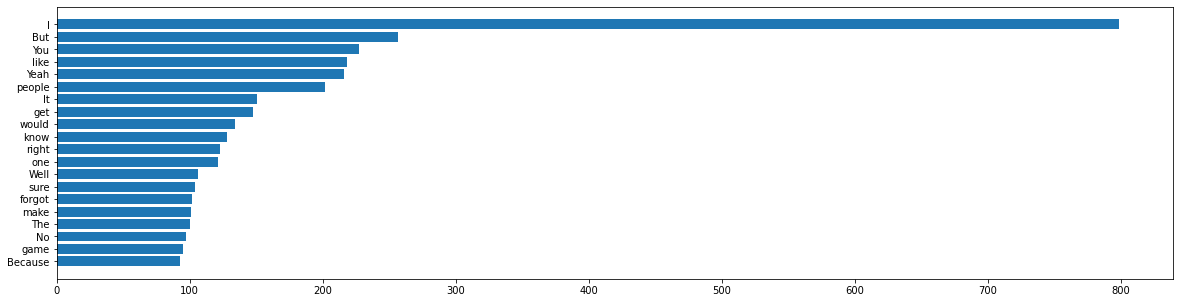

In [ ]:
words_df = words_df.nlargest(columns="count", n = 20) 
words_df.sort_values('count', inplace = True)
plt.figure(figsize=(20,5))
ax = plt.barh(words_df['word'], width = words_df['count'])
plt.show()

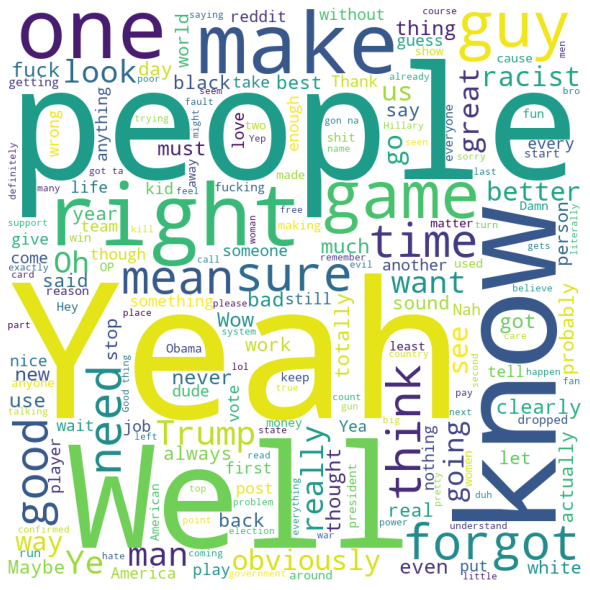

In [ ]:
from wordcloud import WordCloud

#all_words = ' '.join([text for text in word_cloud_df['review_processed']])
 

wordcloud = WordCloud(width = 800, height = 800, 
                      background_color ='white', 
                      min_font_size = 10).generate(all_words)

#plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show()


In [ ]:
aggressive = pd.read_csv('aggressive1.csv')
aggressive = aggressive[['comment', 'label']]
aggressive

,comment,label
0,get fucking real dude,2
1,dirty come crook rengel dems fuck corrupt joke...,2
2,fuck could day let hour ping later sched write...,2
3,dude dont finish enclose fuck shower hate half...,2
4,wtf talk men men thats menage gay,2
...,...,...
7817,nerd laugh,2
7818,gay,2
7819,hate much want smash face,2
7820,yes loser could tell long time ago,2


In [ ]:
sarcastic_aggressive = aggressive.append(sarcastic, ignore_index=True)
sarcastic_aggressive

,comment,label
0,get fucking real dude,2
1,dirty come crook rengel dems fuck corrupt joke...,2
2,fuck could day let hour ping later sched write...,2
3,dude dont finish enclose fuck shower hate half...,2
4,wtf talk men men thats menage gay,2
...,...,...
12797,He white dude good,1
12798,I believe Cleveland game allotted capspace ava...,1
12799,No Sausage Party,1
12800,Because literally three surpass legacy ever,1


In [ ]:
sarcastic_aggressive = sarcastic_aggressive.dropna(axis=0)

In [ ]:
all_comments = sarcastic_aggressive.append(genuine, ignore_index=True)
all_comments['comment'] = all_comments['comment'].str.replace('\d+','')


0        False
1        False
2        False
3        False
4        False
         ...  
19810    False
19811    False
19812    False
19813    False
19814    False
Name: label, Length: 19815, dtype: bool

Label:

*   0 Genuine 
*   1 Sarcastic
*   2 Aggressive

In [ ]:
print("Distribution of comments:", all_comments.groupby('label').count())
print("Total size:", all_comments.count())

Distribution of comments:        comment
label         
0         7021
1         4980
2         7814
Total size: comment    19815
label      19815
dtype: int64


# Alogrithm running and testing

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# Creating sparse matrix of top 2500 tokens
cv = CountVectorizer(max_features = 1000)
X = cv.fit_transform(all_comments.comment).toarray()
y = all_comments.label


In [ ]:

# Splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 101)



In [ ]:
X_train.shape

(15852, 1000)

In [ ]:
from sklearn.naive_bayes import GaussianNB 
classifier = GaussianNB()
classifier.fit(X_train,y_train )


GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print("The model accuracy is", accuracy )

[[ 246  531  631]
 [ 125  509  332]
 [   9   15 1565]]
The model accuracy is 0.5854150895786021


'   Genuine   Sarcastic  Aggressive\n'

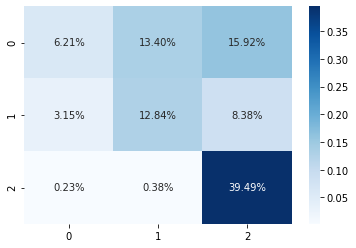

In [ ]:
cm = cm/np.sum(cm)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='.2%')
'''   Genuine   Sarcastic  Aggressive
'''

In [ ]:
print(cv.get_feature_names())

['able', 'absolutely', 'account', 'act', 'action', 'actual', 'actually', 'add', 'added', 'age', 'ago', 'agree', 'ah', 'aint', 'air', 'album', 'all', 'allow', 'allowed', 'almost', 'alone', 'along', 'already', 'alright', 'also', 'always', 'amazing', 'america', 'american', 'amount', 'amp', 'and', 'angry', 'animal', 'another', 'answer', 'anymore', 'anyone', 'anything', 'anyway', 'anyways', 'app', 'apparently', 'apple', 'are', 'area', 'argh', 'around', 'art', 'article', 'as', 'asian', 'ask', 'asking', 'ass', 'asshole', 'assume', 'at', 'attack', 'attention', 'award', 'away', 'awesome', 'aww', 'baby', 'back', 'bad', 'ball', 'band', 'bang', 'bar', 'base', 'based', 'basically', 'bastard', 'beat', 'beautiful', 'because', 'become', 'bed', 'behind', 'believe', 'bernie', 'best', 'bet', 'better', 'big', 'birthday', 'bit', 'bitch', 'black', 'block', 'blog', 'blood', 'blow', 'blue', 'body', 'boo', 'book', 'bother', 'bought', 'box', 'boy', 'brain', 'break', 'bring', 'bro', 'broken', 'brother', 'btw', '

In [ ]:
print(type(X_train))


<class 'numpy.ndarray'>


In [ ]:
import pickle 
# save the model to disk
filename = 'finalized_model2.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [ ]:
filename = 'CV.sav'
pickle.dump(cv, open(filename, 'wb'))

In [ ]:
y_pred

array([2, 1, 2, ..., 2, 2, 2])

In [ ]:
fig1, ax1 = plt.subplots()
ax1.pie(y_pred, labels= 'Genuine ,','  Sarcastic ', 'Aggressive', autopct='%1.1f%%', shadow=True)
ax1.axis('equal')
plt.show()

SyntaxError: ignored